In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ageinc_df = pd.read_csv('ageinc.csv')
ageinc_df

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53
...,...,...
995,70615,29
996,95102,41
997,42203,35
998,16975,31


In [ ]:
ageinc_df.columns

Index(['income', 'age'], dtype='object')

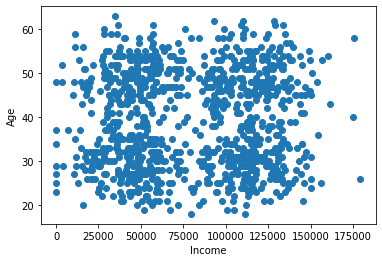

In [ ]:
plt.scatter(ageinc_df['income'],
            ageinc_df['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(ageinc_df[['income']])
ageinc_df['income_Z'] = scaler.transform(ageinc_df[['income']])

scaler = StandardScaler().fit(ageinc_df[['age']])
ageinc_df['age_Z'] = scaler.transform(ageinc_df[['age']])

In [ ]:
from sklearn.cluster import MeanShift
from sklearn import cluster

x = ageinc_df[['income_Z', 'age_Z']]
bandwidth = cluster.estimate_bandwidth(x, quantile = 0.1)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)

ms.fit(x)

MeanShift(bandwidth=0.6371390561473768, bin_seeding=True)

In [ ]:
ageinc_df['Cluster'] = ms.labels_
print(f'Numero de Clusters: {len(ageinc_df.Cluster.unique())}')

Numero de Clusters: 4


<Figure size 1440x1440 with 0 Axes>

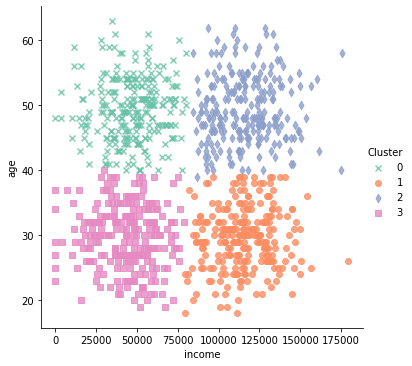

In [ ]:
plt.figure(figsize = (20,20))
sns.lmplot( x = 'income',
            y = 'age',
            data = ageinc_df,
            hue = 'Cluster',
            markers = ['x','o','d','s'],
            fit_reg = False,
             palette="Set2")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11bf7be5-3b62-4605-8e79-42e562c1fd79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>